In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.duplicated().sum() 

0

<Axes: >

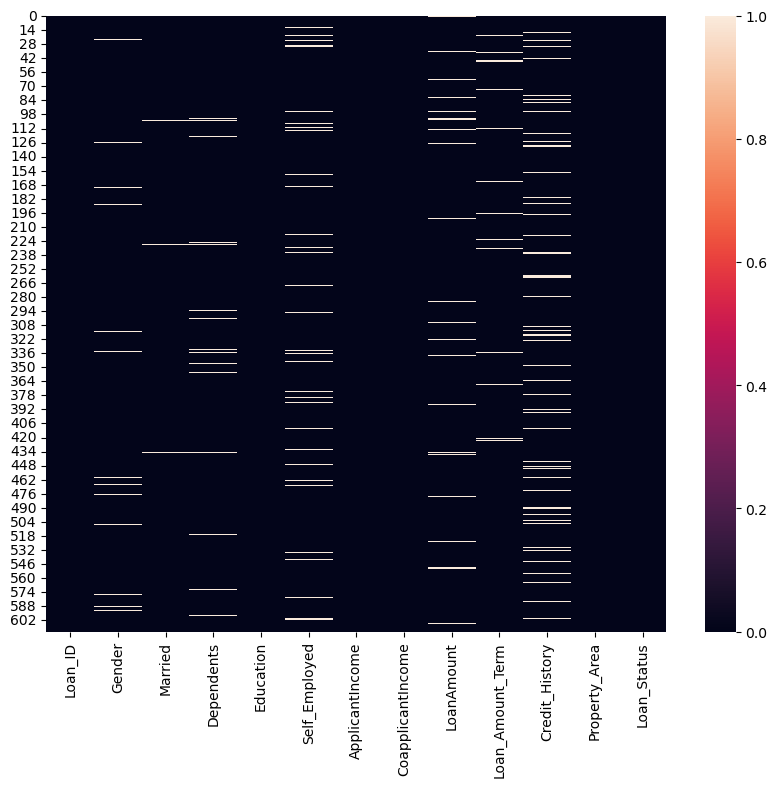

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [7]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [8]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


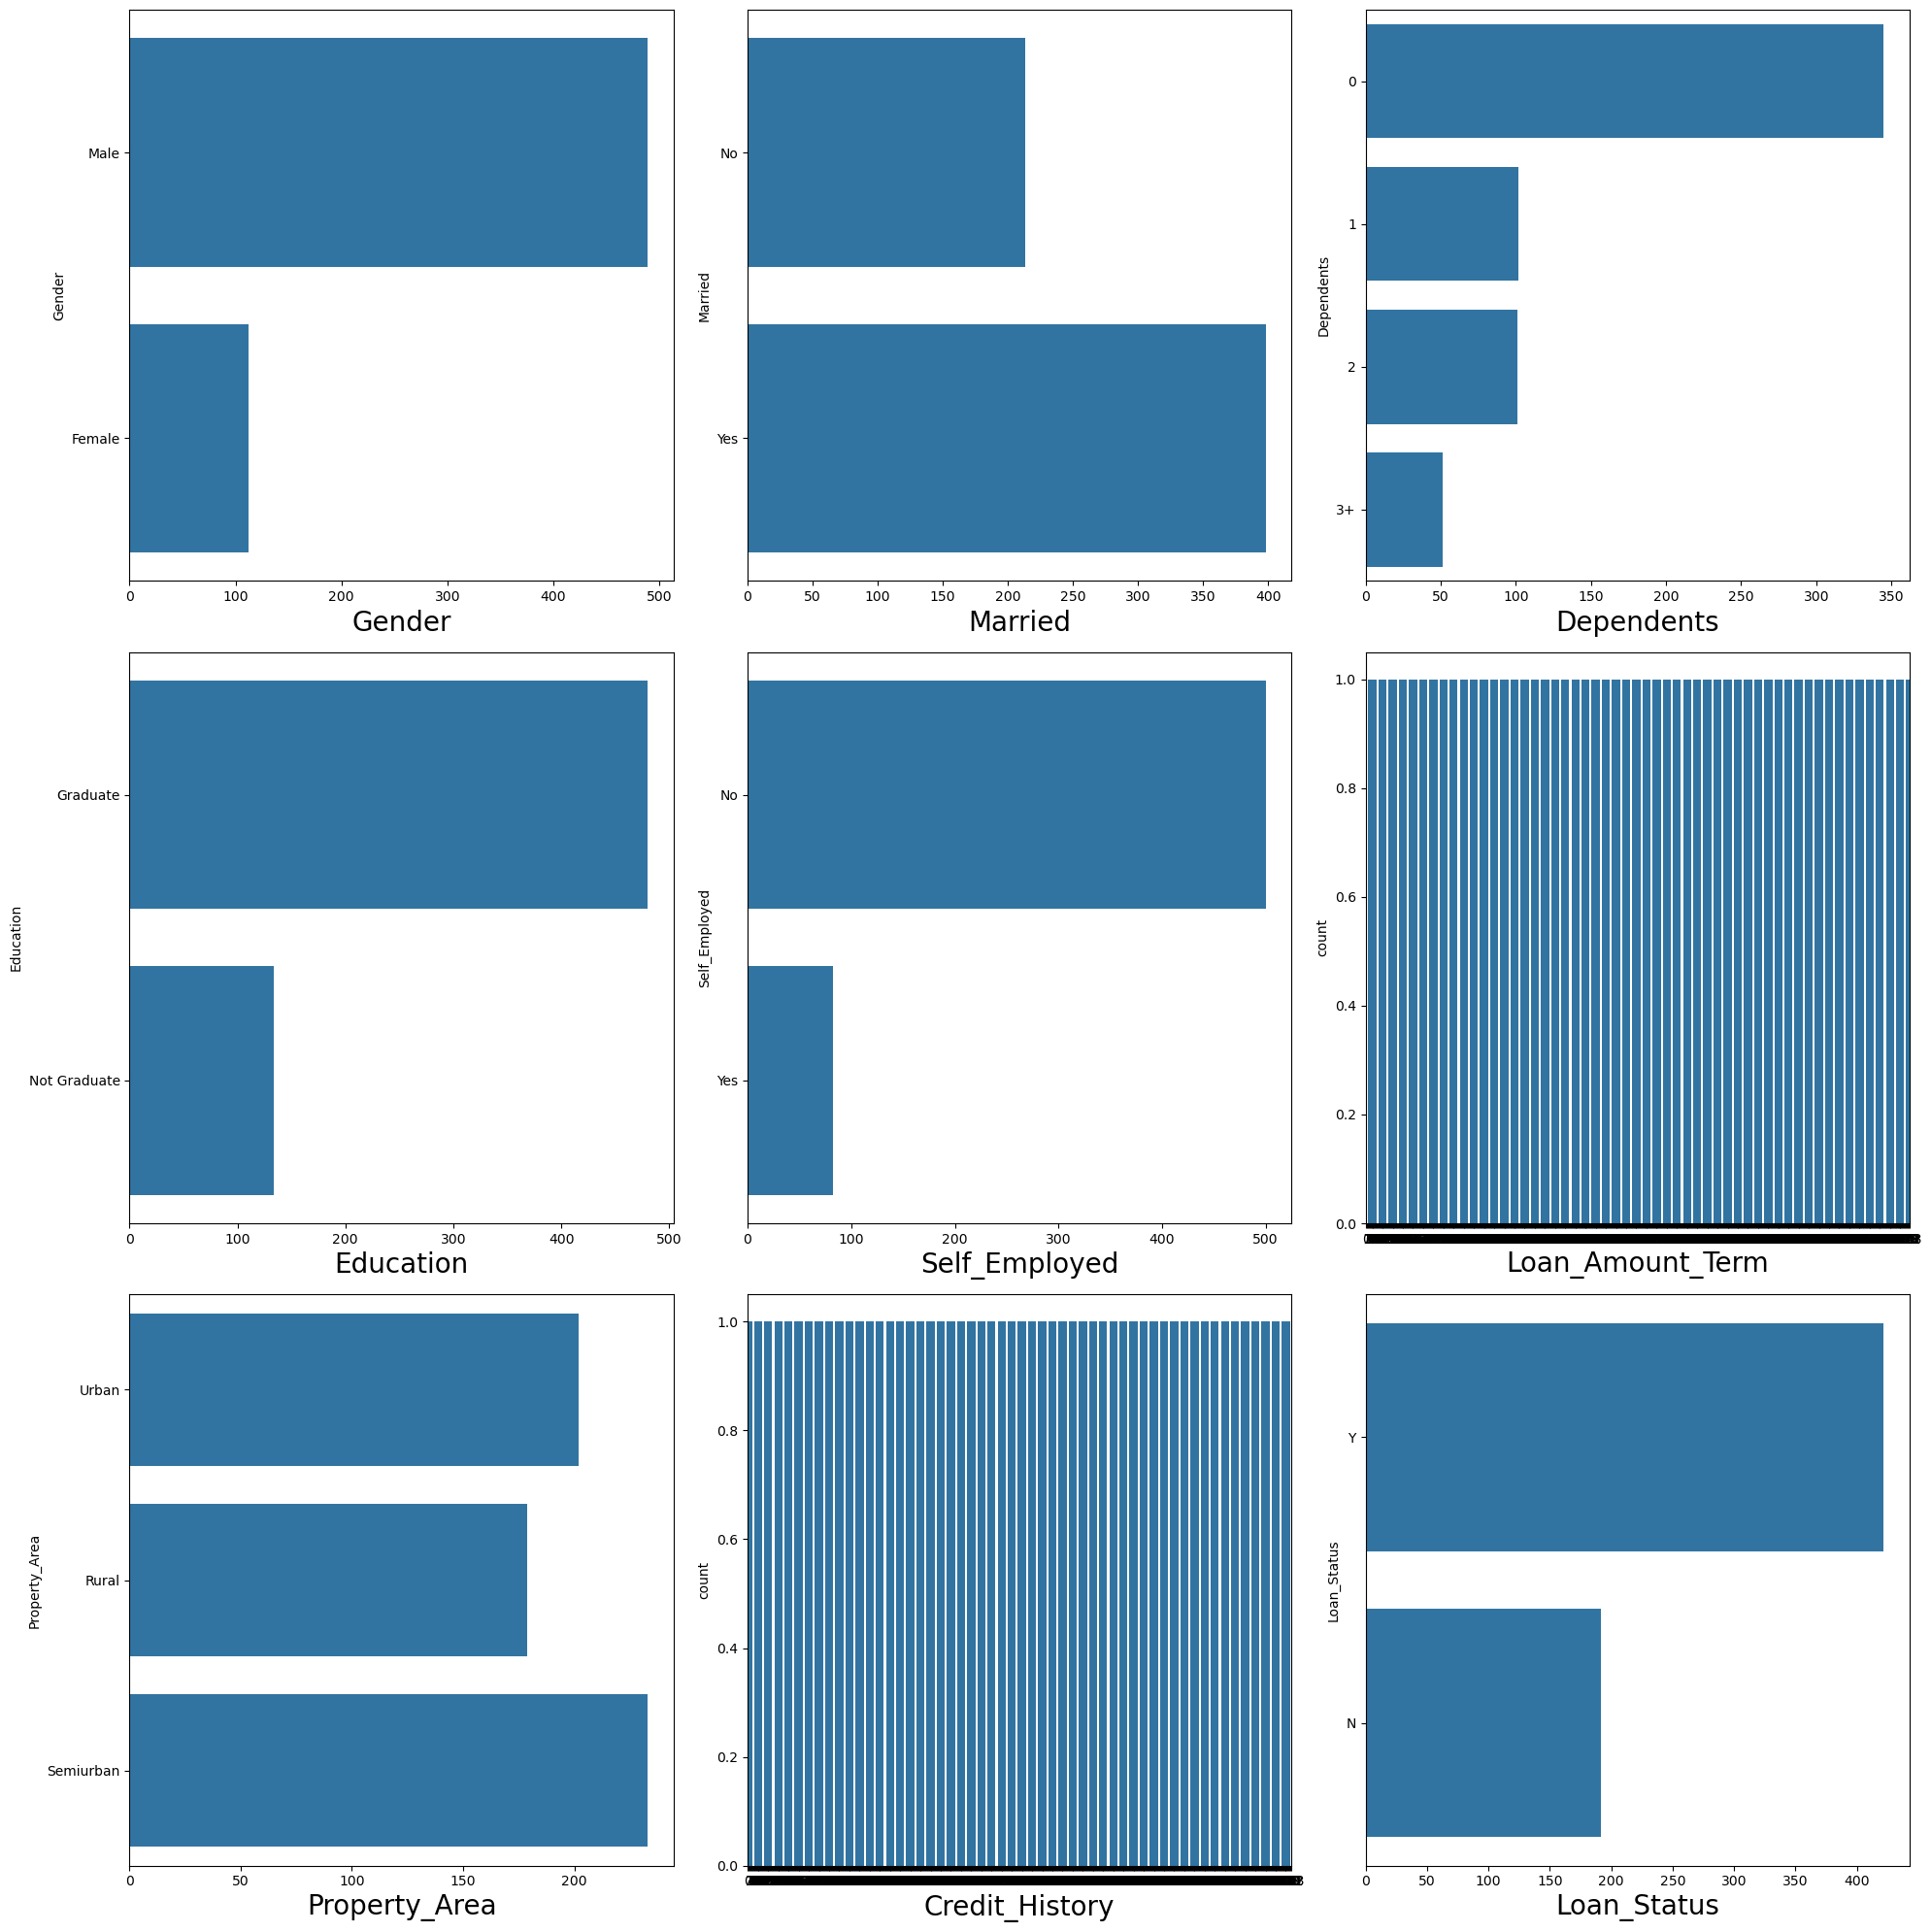

In [9]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

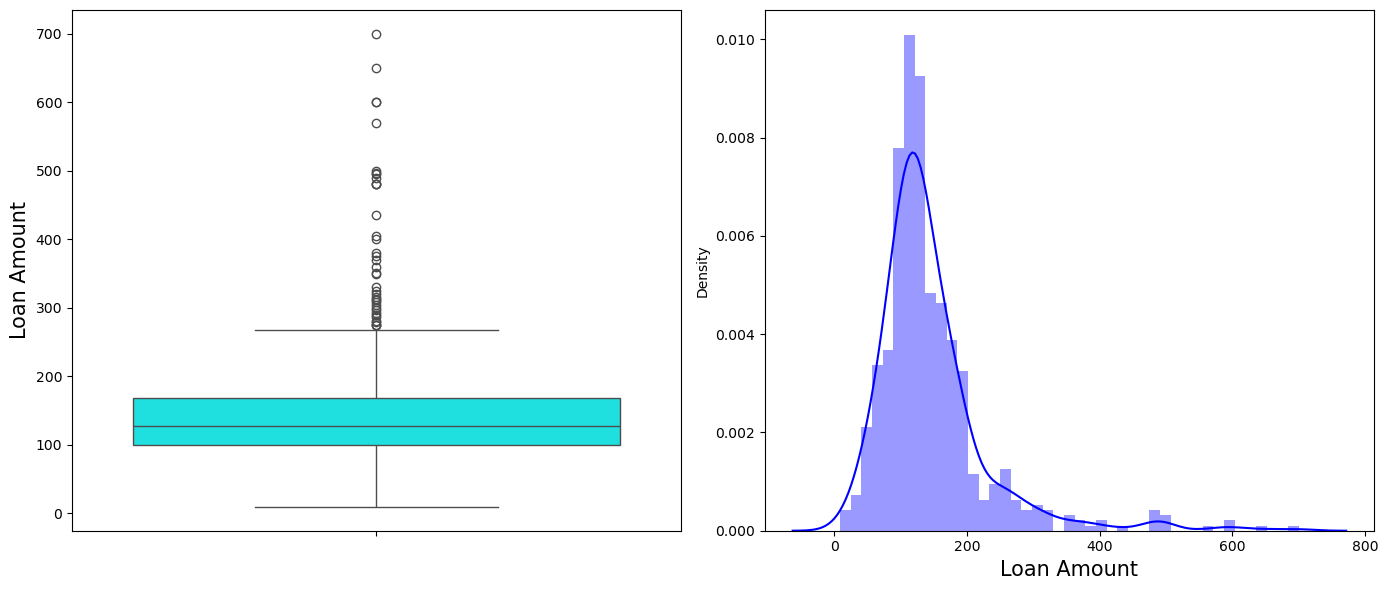

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [11]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


In [12]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [13]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


<Axes: >

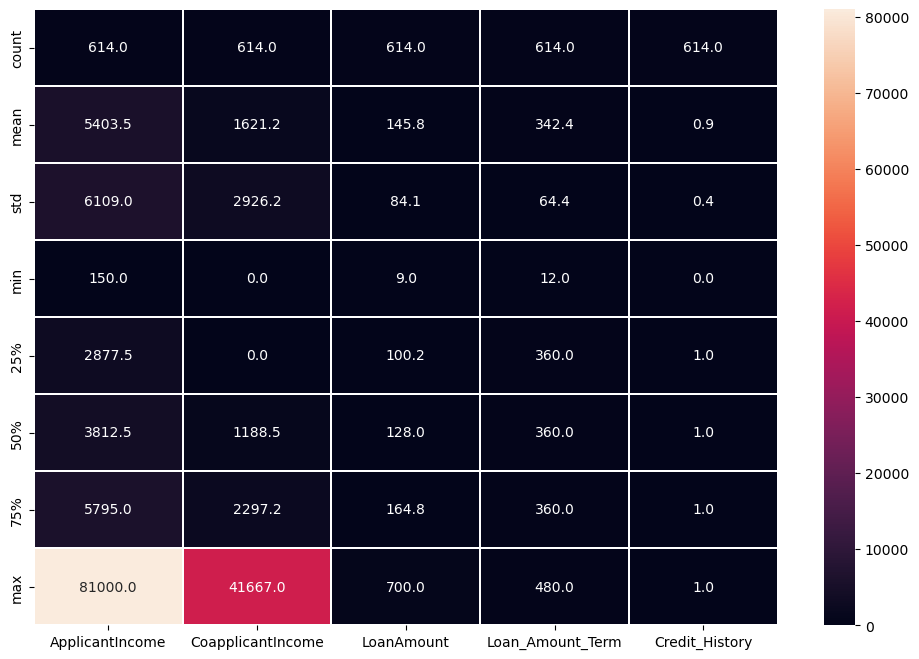

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [16]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

In [17]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True)

Loan_Status      N           Y       All
Gender      Female Male Female Male     
Dependents                              
0               27   86     56  191  360
1                6   30     13   53  102
2                2   23      5   71  101
3+               2   16      1   32   51
All             37  155     75  347  614

In [18]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

In [19]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

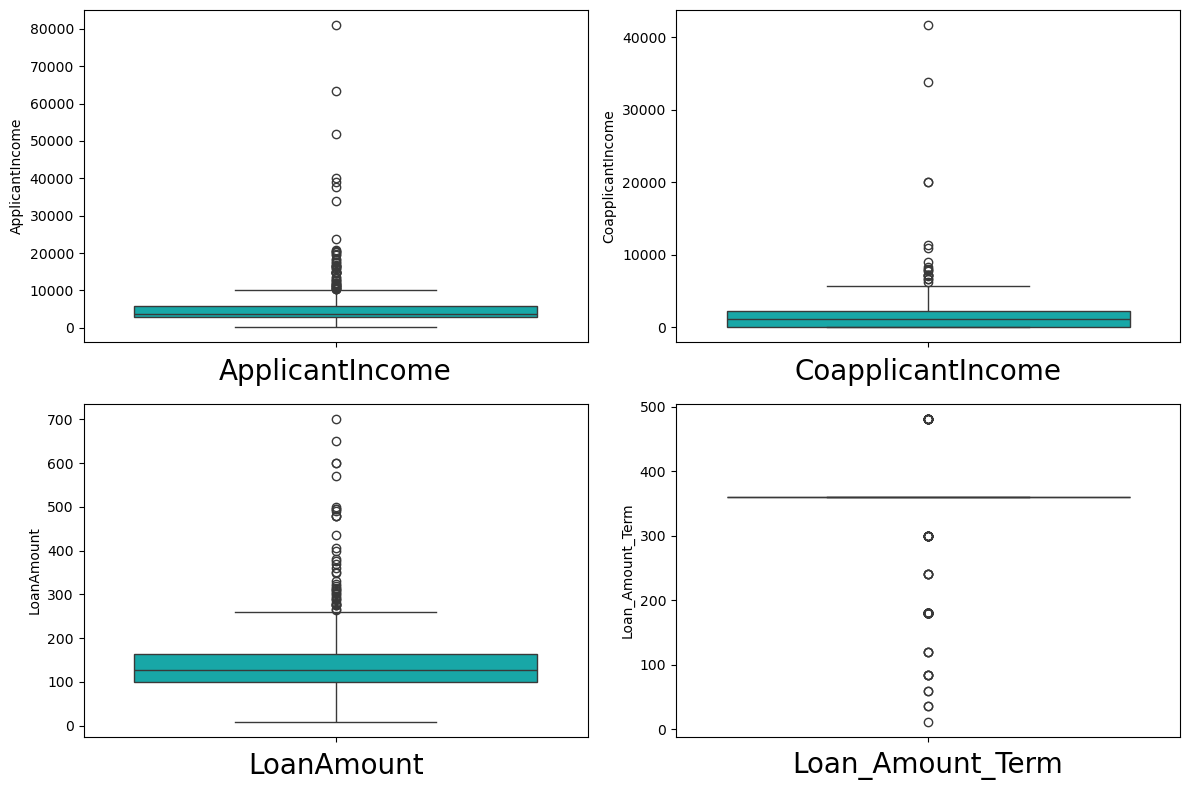

In [20]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [21]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [22]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [23]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


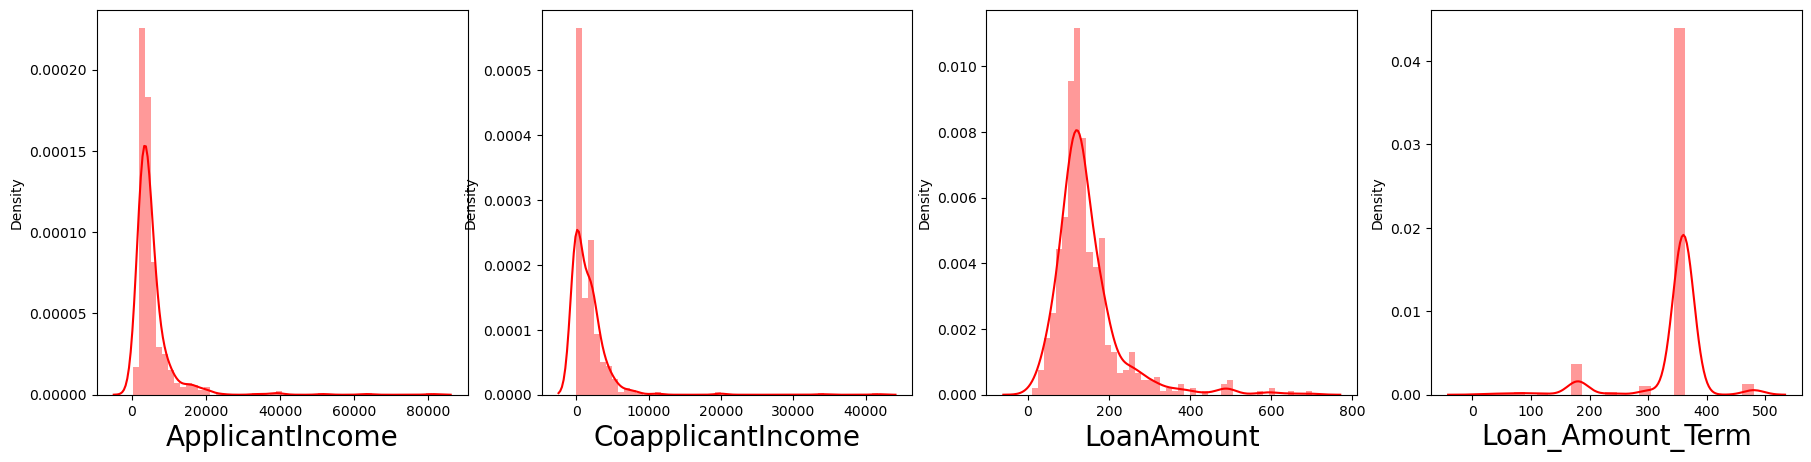

In [26]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [28]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [31]:
from scipy.stats import zscore

In [32]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
df=df1.copy()

In [33]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [34]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [35]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


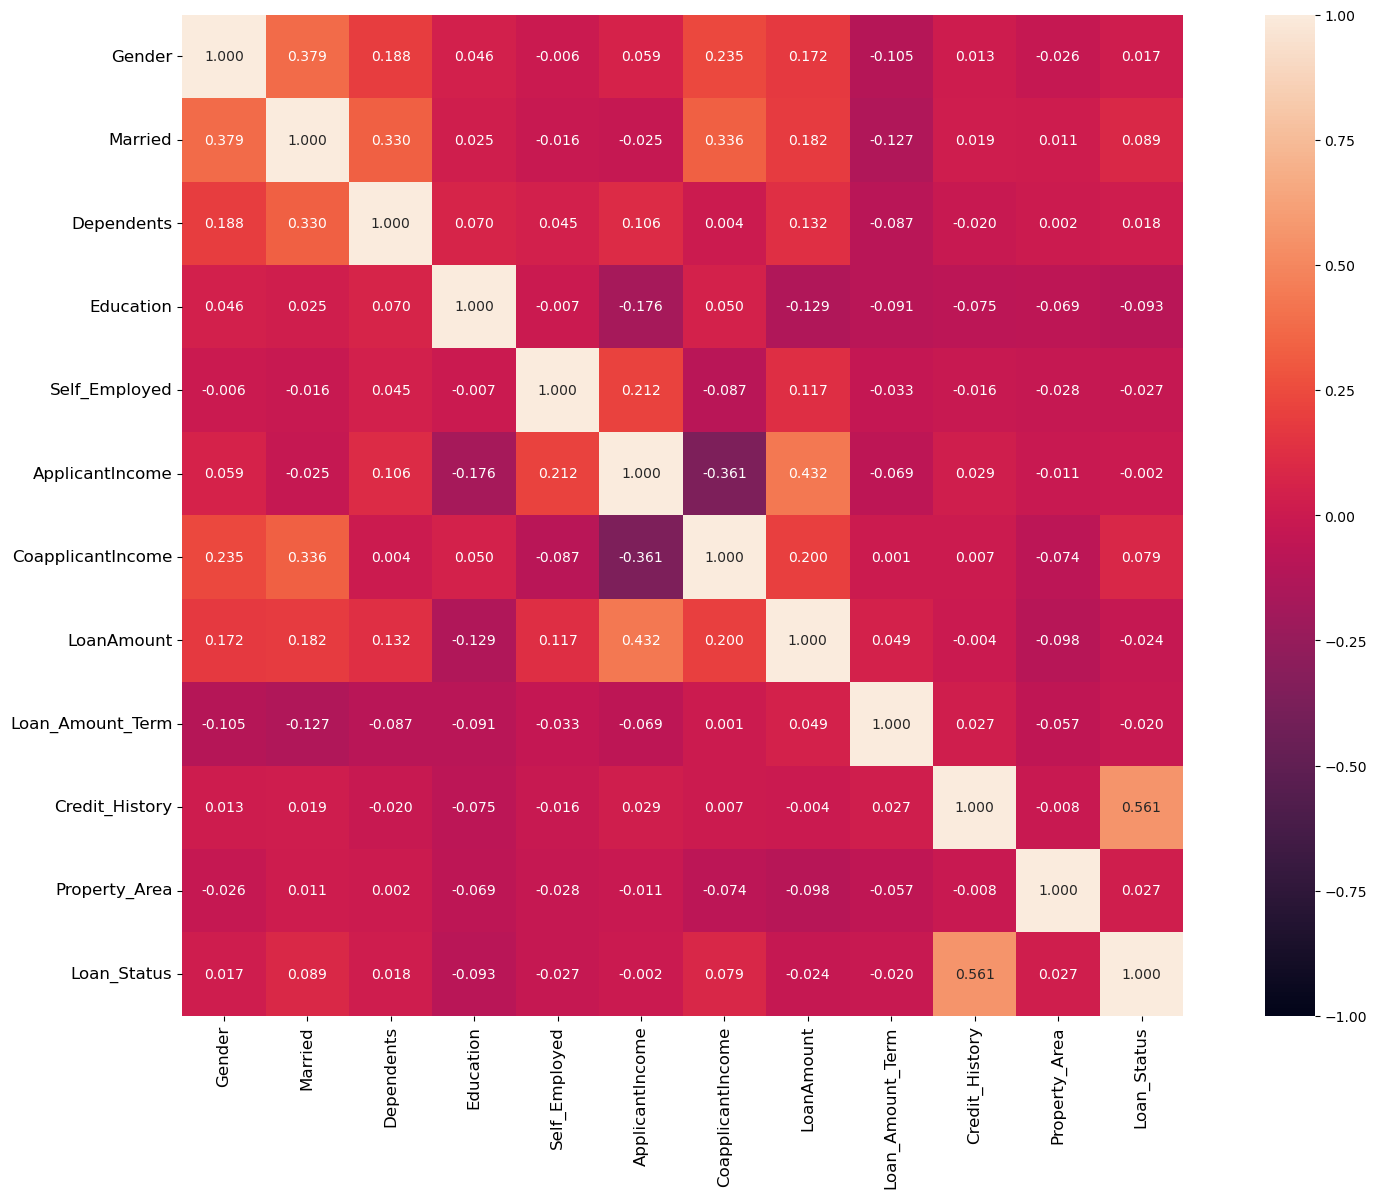

In [36]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


In [38]:
df.Loan_Status.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [41]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [42]:
Y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8200836820083682 on Random_state 245


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print("Logistics Regression Evaluation")
print('\n')
print("Accuracy Score of Logistics Regression :", accuracy_score(Y_test, y_pred))
print('\n')
print("Confusion matrix of Logistics Regression :",confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8158995815899581


Confusion matrix of Logistics Regression : [[ 73  37]
 [  7 122]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.91      0.66      0.77       110
           1       0.77      0.95      0.85       129

    accuracy                           0.82       239
   macro avg       0.84      0.80      0.81       239
weighted avg       0.83      0.82      0.81       239



In [50]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [51]:
rmse_val = []
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4968520148758506
RMSE value for k=  2 is: 0.513418276223035
RMSE value for k=  3 is: 0.4527923591472056
RMSE value for k=  4 is: 0.50104493321917
RMSE value for k=  5 is: 0.4527923591472056
RMSE value for k=  6 is: 0.47971400126799746
RMSE value for k=  7 is: 0.4527923591472056
RMSE value for k=  8 is: 0.47091116165974684
RMSE value for k=  9 is: 0.43391764060527876
RMSE value for k=  10 is: 0.47091116165974684
RMSE value for k=  11 is: 0.45738935374634826
RMSE value for k=  12 is: 0.4664474480124446
RMSE value for k=  13 is: 0.4290692466374651
RMSE value for k=  14 is: 0.4883581921595791
RMSE value for k=  15 is: 0.47971400126799746
RMSE value for k=  16 is: 0.5093272287453544
RMSE value for k=  17 is: 0.4527923591472056
RMSE value for k=  18 is: 0.4840553929365547
RMSE value for k=  19 is: 0.4527923591472056
RMSE value for k=  20 is: 0.4753329597178616
RMSE value for k=  21 is: 0.45738935374634826
RMSE value for k=  22 is: 0.4753329597178616
RMSE value for 

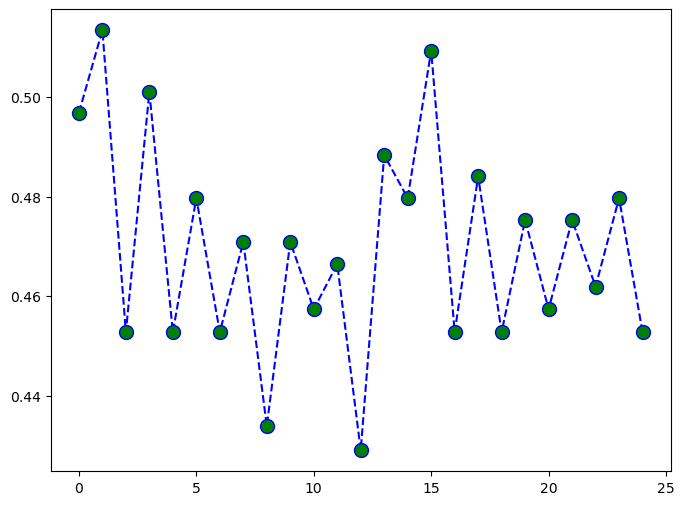

In [52]:
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [55]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7866108786610879


Confusion matrix : 
 [[ 77  33]
 [ 18 111]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       110
           1       0.77      0.86      0.81       129

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.79      0.78       239





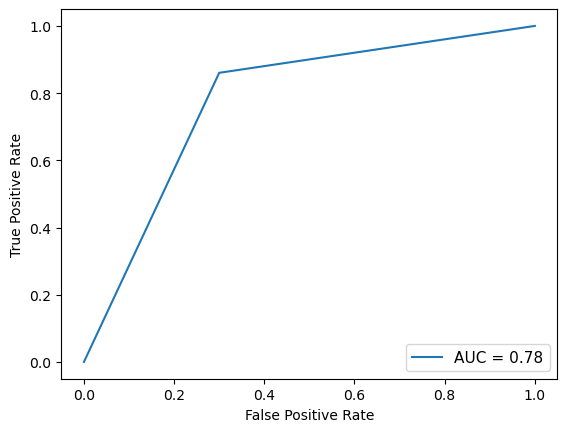

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7656903765690377


Confusion matrix : 
 [[ 68  42]
 [ 14 115]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.62      0.71       110
           1       0.73      0.89      0.80       129

    accuracy                           0.77       239
   macro avg       0.78      0.75      0.76       239
weighted avg       0.78      0.77      0.76       239





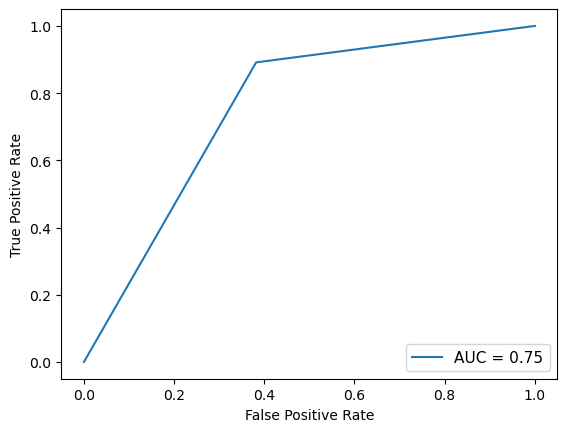

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.8117154811715481


Confusion matrix : 
 [[ 89  21]
 [ 24 105]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       110
           1       0.83      0.81      0.82       129

    accuracy                           0.81       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239





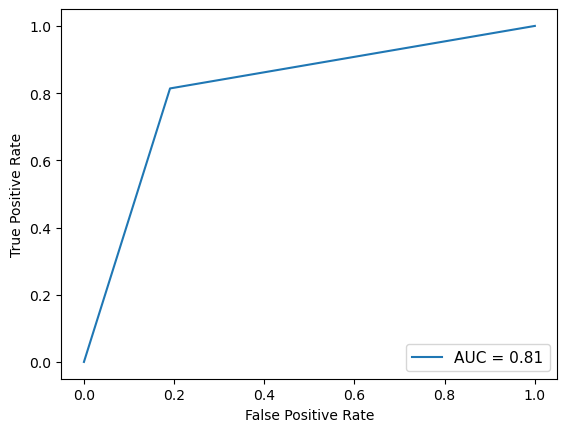

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7949790794979079


Confusion matrix : 
 [[91 19]
 [30 99]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       110
           1       0.84      0.77      0.80       129

    accuracy                           0.79       239
   macro avg       0.80      0.80      0.79       239
weighted avg       0.80      0.79      0.80       239





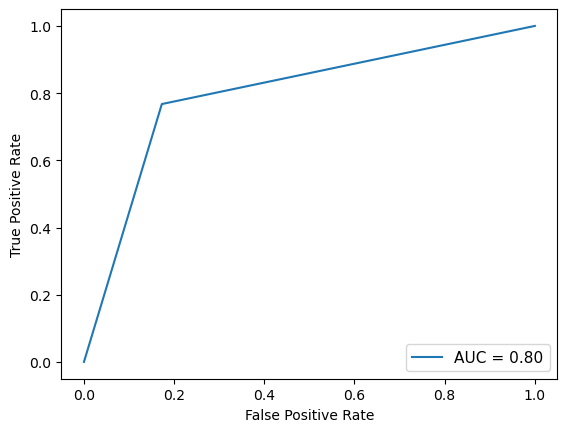

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8326359832635983


Confusion matrix : 
 [[ 86  24]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       110
           1       0.82      0.88      0.85       129

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239





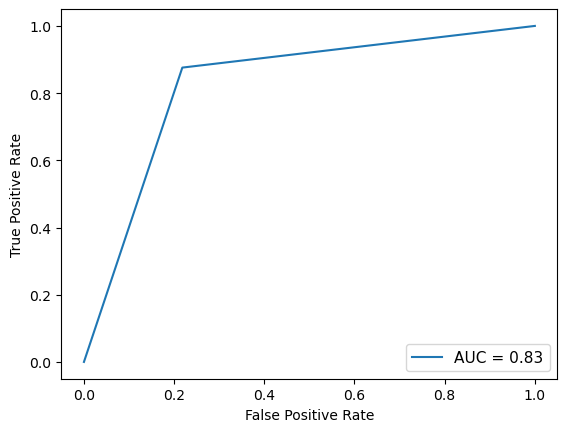

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8368200836820083


Confusion matrix : 
 [[ 89  21]
 [ 18 111]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       110
           1       0.84      0.86      0.85       129

    accuracy                           0.84       239
   macro avg       0.84      0.83      0.84       239
weighted avg       0.84      0.84      0.84       239





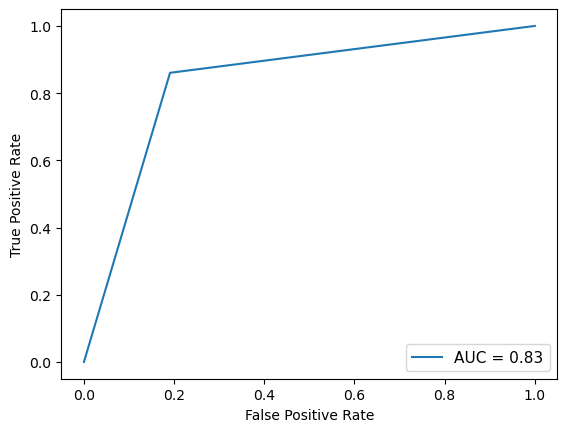

In [58]:
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    fpr,tpr,threshold=roc_curve(Y_test,y_pred)
    roc_auc=auc(fpr,tpr)
    display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
    display.plot()  
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print("=========================================================================================")

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('========================================================')



Cross Validation Score LogisticRegression() :

Score : [0.70625    0.72955975 0.7672956  0.77987421 0.79245283]
Mean Score : 0.7550864779874213
Std deviation : 0.032237723953381016




Cross Validation Score SVC() :

Score : [0.7        0.74213836 0.80503145 0.79245283 0.78616352]
Mean Score : 0.7651572327044026
Std deviation : 0.03886283575814347




Cross Validation Score GaussianNB() :

Score : [0.69375    0.71698113 0.80503145 0.77358491 0.79245283]
Mean Score : 0.7563600628930818
Std deviation : 0.04344883614877896




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7        0.72955975 0.77987421 0.77987421 0.79245283]
Mean Score : 0.7563522012578616
Std deviation : 0.03550558174699353




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.73125    0.74213836 0.77987421 0.79874214 0.72955975]
Mean Score : 0.7563128930817611
Std deviation : 0.027929100601646956




Cross Validation Score RandomForestClassifier() :

Score : [0.75       0.7610062

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [63]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.661 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.670 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.811 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.730 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [64]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 60}

In [66]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 60, max_depth=50 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.8368200836820083


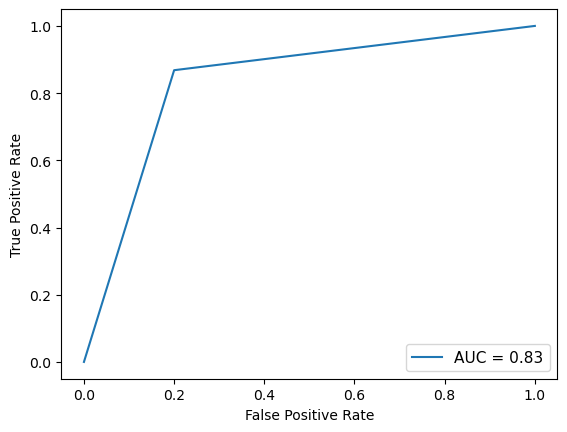

In [67]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()  
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [68]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']

In [69]:
model=joblib.load("Loan_Status_Final.pkl")
prediction=model.predict(X_test)
prediction

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [70]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

,Predicted,Actual
0,1,1
1,0,0
2,1,1
3,1,0
4,1,1
...,...,...
234,1,1
235,0,0
236,0,0
237,1,0
